# Exploring US Incarceration Rates by State

In [10]:
# Import the libararies that we may use in this analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the csv files as pandas dataframes

admissions_releases = pd.read_csv('admissions_releases_states.csv')
populations = pd.read_csv('populations_states.csv')
admissions_releases.head()

,date,admissions_total,admissions_white,admissions_black,admissions_hispanic,admissions_amerind,admissions_asian,admissions_other,releases_total,releases_white,releases_black,releases_hispanic,releases_amerind,releases_asian,releases_other,state
0,2015-02-01,1583,600,193,633.0,130.0,6.0,21.0,1649,653,194,688.0,85.0,7.0,22.0,Arizona
1,2015-03-01,1580,615,189,640.0,114.0,3.0,19.0,1559,644,169,610.0,111.0,6.0,19.0,Arizona
2,2015-04-01,1779,706,235,701.0,115.0,4.0,18.0,1693,703,206,657.0,93.0,5.0,29.0,Arizona
3,2015-05-01,1821,730,260,669.0,125.0,8.0,29.0,1659,685,193,616.0,136.0,3.0,26.0,Arizona
4,2015-06-01,1689,704,215,618.0,129.0,0.0,23.0,1570,651,174,603.0,111.0,7.0,24.0,Arizona


In [11]:
print(populations.shape)
populations.head()

(9585, 13)


,date,data_or_inferred,incarcerated_total,incarcerated_white,incarcerated_black,incarcerated_hispanic,incarcerated_amerind,incarcerated_asian,incarcerated_other,incarcerated_unknown,incarcerated_nonwhite,state,url
0,2000-01-01,raw data,25213.0,8753,16382.0,NaN,NaN,NaN,78.0,NaN,16460.0,Alabama,http://www.doc.state.al.us/StatReports
1,2000-02-01,raw data,25213.0,8753,16382.0,NaN,NaN,NaN,78.0,NaN,16460.0,Alabama,http://www.doc.state.al.us/StatReports
2,2000-03-01,raw data,25161.0,8723,16361.0,NaN,NaN,NaN,77.0,NaN,16438.0,Alabama,http://www.doc.state.al.us/StatReports
3,2000-04-01,raw data,25200.0,8738,16380.0,NaN,NaN,NaN,82.0,NaN,16462.0,Alabama,http://www.doc.state.al.us/StatReports
4,2000-05-01,raw data,25226.0,8788,16358.0,NaN,NaN,NaN,80.0,NaN,16438.0,Alabama,http://www.doc.state.al.us/StatReports


In [12]:
# Make sure to remove any potential leading and trailing whitespace from the column names.
# That way, we won't get any mysterious errors in the future.

populations.rename(columns=lambda x: x.strip(), inplace=True)

In [13]:
# Create a new database that only includes the latest date for each state.
# That way we have a single point in time for each state so we can more simply and easily compare by state.

populations_states = populations

populations_states['date'] = pd.to_datetime(populations_states['date'])

populations_states.sort_values('date', ascending=False, inplace=True)

populations_states.drop_duplicates(subset='state', keep='first', inplace=True)

populations_states.sort_values('state', ascending=True, inplace=True)

print(populations_states.shape)

populations_states.head()

(52, 13)


,date,data_or_inferred,incarcerated_total,incarcerated_white,incarcerated_black,incarcerated_hispanic,incarcerated_amerind,incarcerated_asian,incarcerated_other,incarcerated_unknown,incarcerated_nonwhite,state,url
270,2022-07-01,raw data,26093.0,12023,13843.0,NaN,NaN,NaN,227.0,NaN,14070.0,Alabama,http://www.doc.state.al.us/StatReports
399,2022-09-01,raw data,4648.0,1775,470.0,129.0,1977.0,249.0,48.0,NaN,2873.0,Alaska,https://doc.alaska.gov/administrative-services...
552,2022-09-01,raw data,33387.0,12658,4987.0,13142.0,1834.0,NaN,766.0,NaN,20729.0,Arizona,https://corrections.az.gov/reports-documents/r...
764,2022-08-01,raw data,17109.0,10129,7173.0,592.0,NaN,NaN,175.0,NaN,6980.0,Arkansas,https://doc.arkansas.gov/correction/publicatio...
881,2022-09-01,raw data,96551.0,19358,27077.0,43838.0,NaN,NaN,6278.0,NaN,77193.0,California,https://public.tableau.com/app/profile/cdcr.or...


In [14]:
# Using the describe method gives a quick overview of the the numeric variables.

populations_states.describe()

,incarcerated_total,incarcerated_white,incarcerated_black,incarcerated_hispanic,incarcerated_amerind,incarcerated_asian,incarcerated_other,incarcerated_unknown,incarcerated_nonwhite
count,52.000000,52.000000,51.000000,36.000000,40.000000,37.000000,35.000000,21.000000,52.000000
mean,22939.750000,10215.384615,8862.745098,3996.111111,486.700000,189.405405,576.828571,75.285714,12724.365385
std,30336.576738,14197.285507,12121.947772,9754.409382,783.700597,393.448886,1191.039301,115.947895,17955.262497
min,1334.000000,50.000000,80.000000,0.000000,2.000000,0.000000,6.000000,0.000000,224.000000
25%,5330.500000,2666.000000,743.500000,263.000000,35.000000,29.000000,35.000000,2.000000,2592.500000
50%,14029.500000,6849.000000,4051.000000,883.000000,199.000000,90.000000,111.000000,28.000000,7073.000000
75%,26338.250000,12667.500000,12937.000000,2207.250000,594.500000,185.000000,599.500000,86.000000,15902.000000
max,158041.000000,91122.000000,60652.000000,43838.000000,4023.000000,2244.000000,6278.000000,381.000000,81152.000000


In [15]:
# Let's drop unneccesary columns before we do any visualization.

populations_states.drop(columns=['data_or_inferred', 'date', 'url'], inplace=True)

In [16]:
# Checking for any values of zero.

zeros_count_per_column = (populations_states == 0).sum(axis=0)
print("Count of zeros in each column:")
print(zeros_count_per_column)

Count of zeros in each column:
incarcerated_total       0
incarcerated_white       0
incarcerated_black       0
incarcerated_hispanic    1
incarcerated_amerind     0
incarcerated_asian       1
incarcerated_other       0
incarcerated_unknown     2
incarcerated_nonwhite    0
state                    0
dtype: int64


### Many of the columns are missing data, however some of the columns contain values of zero. It seems most likely then that where there is missing data is because certain states chose not to track certain people groups. 

In [17]:
# Before creating a vizualization of the data, let's trim it down to the top 10 states by incarceration rates.
# That way, the graph won't be too crowded.

populations_states.sort_values('incarcerated_total', ascending=False, inplace=True)

top_10_states = populations_states.head(10).copy()

top_10_states.head(10)

,incarcerated_total,incarcerated_white,incarcerated_black,incarcerated_hispanic,incarcerated_amerind,incarcerated_asian,incarcerated_other,incarcerated_unknown,incarcerated_nonwhite,state
9584,158041.0,91122,60652.0,NaN,4023.0,2244.0,NaN,NaN,66919.0,Federal
7967,122133.0,40981,39708.0,40720.0,NaN,NaN,724.0,NaN,81152.0,Texas
881,96551.0,19358,27077.0,43838.0,NaN,NaN,6278.0,NaN,77193.0,California
1653,83289.0,38894,39904.0,4037.0,NaN,NaN,454.0,0.0,44395.0,Florida
1793,47917.0,17641,28135.0,1947.0,23.0,162.0,31.0,1.0,30276.0,Georgia
6554,43612.0,22506,19495.0,NaN,NaN,NaN,1611.0,NaN,21106.0,Ohio
7213,36782.0,16069,16977.0,507.0,42.0,111.0,3077.0,NaN,20713.0,Pennsylvania
552,33387.0,12658,4987.0,13142.0,1834.0,NaN,766.0,NaN,20729.0,Arizona
3751,32114.0,14574,NaN,NaN,NaN,NaN,NaN,NaN,17540.0,Michigan
5735,31029.0,7181,15124.0,7470.0,322.0,211.0,721.0,NaN,23848.0,New York


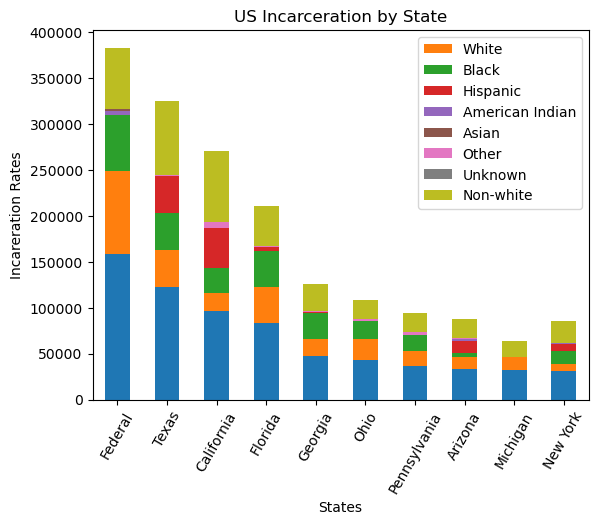

In [18]:
top_10_states.set_index('state', inplace=True)
ax = top_10_states.plot(kind='bar', stacked=True)

# Remove the "incarcerated_total" column from the legend
handles, labels = ax.get_legend_handles_labels()
handles = handles[1:]
labels = labels[1:]

new_labels = ['White', 'Black', 'Hispanic', 'American Indian', 'Asian', 'Other', 'Unknown', 'Non-white']
labels = new_labels
ax.legend(handles, labels)

plt.xlabel('States')
plt.ylabel('Incareration Rates')
plt.title('US Incarceration by State')

# Increase spacing between x-axis labels and rotate them to an angle
#plt.subplots_adjust(bottom=.6)
plt.xticks(rotation=60)

# Decrease font size of x-axis labels
#plt.xticks(fontsize=8)

plt.show()